## Credit Card Customer Segmentation

This project is for a ccredit card company. They have a dataset that contains information about the company's clients. We have been asked to segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

we will use the K-means algorithm to segment the data. The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.



In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

1. Analyze the dataset;
2. Prepare the data for modeling;
3. Find an appropriate number of clusters;
4. Segment the data;
5. Interpret and explain the results.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style(style="whitegrid")

# Function used to add labels containing values to top of bars in seaborn barplots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [3]:
#Read in the data into a dataframe
customer_seg = pd.read_csv('customer_segmentation.csv')

In [4]:
#Explore the data set
customer_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

The dataset has 10127 entries, And 14 columns

We have 9 columns with integer values and 2 with floating point numbers

Now lets check for Categorical values

In [5]:
# Create an empty list to store the categorical column names
categorical_columns = []

# Iterate over each column in the DataFrame
for column in customer_seg.columns:
    # Check if the column has less unique values than  7
    if len(customer_seg[column].unique()) < 7:
        categorical_columns.append(column)

# Print the list of categorical column names
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['gender', 'dependent_count', 'education_level', 'marital_status', 'total_relationship_count']


Lets check for unique values in the columns above and decide which ones are true categorical columns

In [6]:
columns_to_check = ['gender', 'dependent_count', 'education_level', 'marital_status', 'total_relationship_count']

for column in columns_to_check:
    print("Value counts for column:", column)
    print(customer_seg[column].value_counts())
    print()

Value counts for column: gender
F    5358
M    4769
Name: gender, dtype: int64

Value counts for column: dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: dependent_count, dtype: int64

Value counts for column: education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

Value counts for column: marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

Value counts for column: total_relationship_count
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: total_relationship_count, dtype: int64



Columns taken as categorical:

Education level 
Marital status
gender

In [7]:
#Lets check for missing values
customer_seg.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

There are no missing values

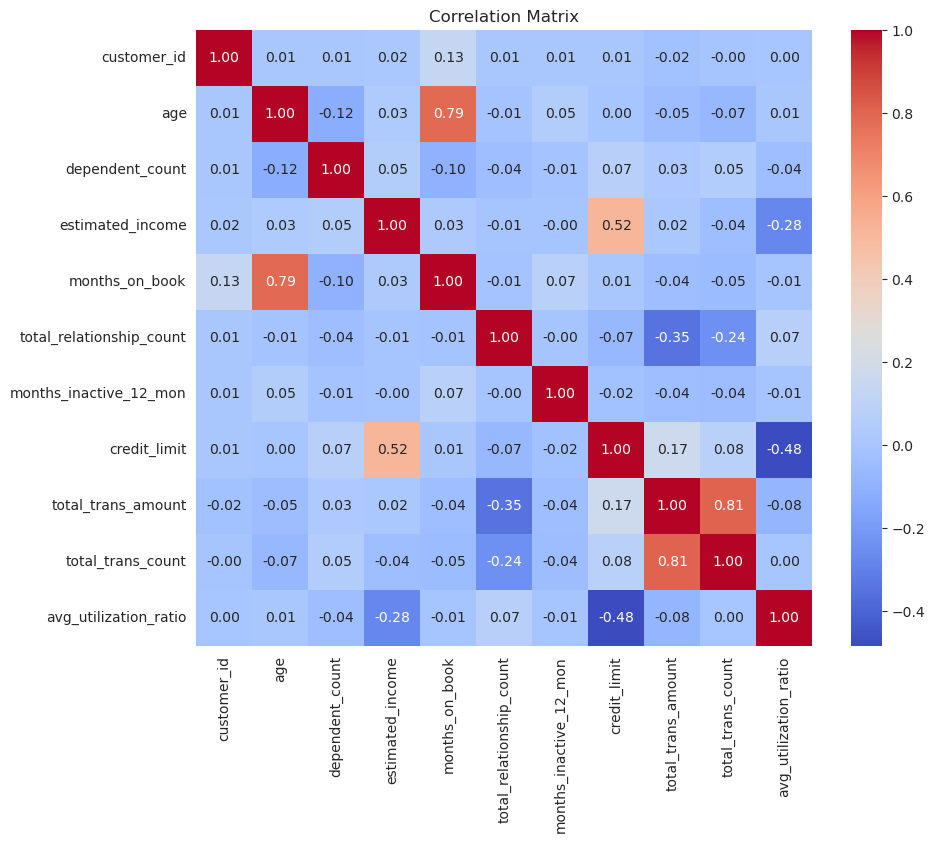

In [8]:
#Lets look at the correlation

correlation_matrix = customer_seg.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()



Observations:
    
    1. Age is highly correlated with months_on_book
    2. Estimated_income is highly correlated with credit limit
    3. total_trans_amount is highly correlated with total_trans_count
    4. avg_utilization_ratio is correlated with credit_limit
    5. total_trans_amount is correlated with total_realationship_count

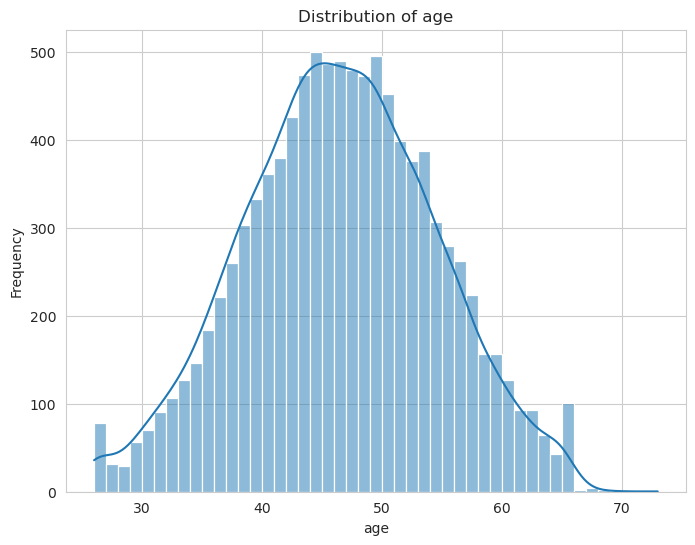

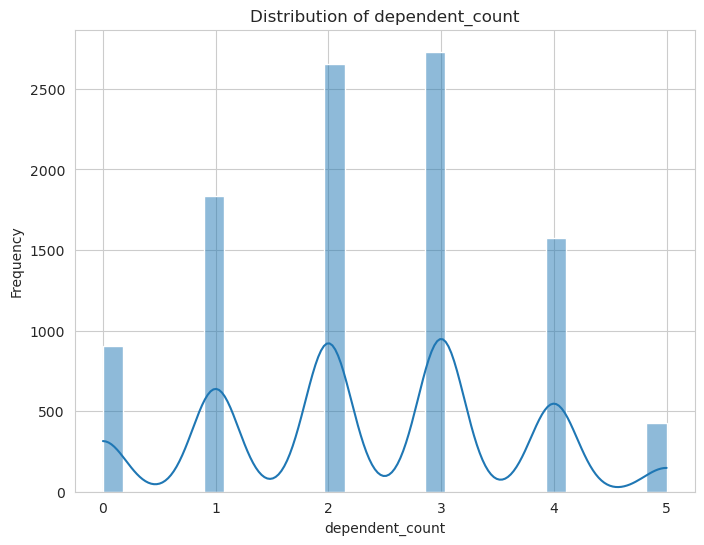

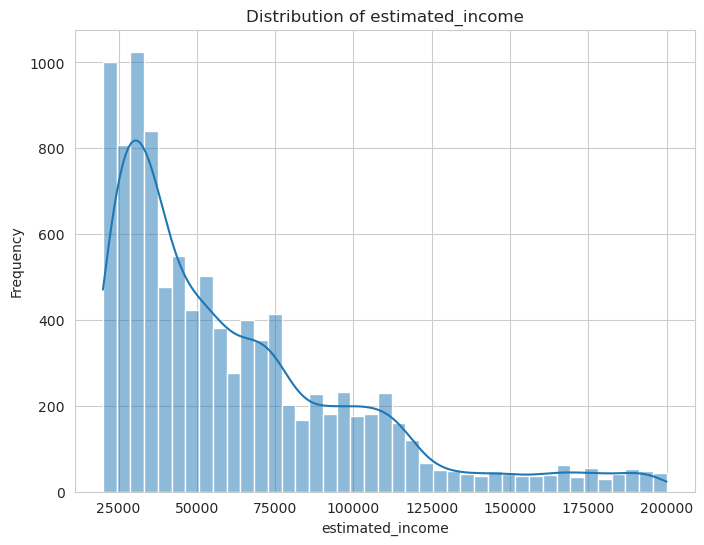

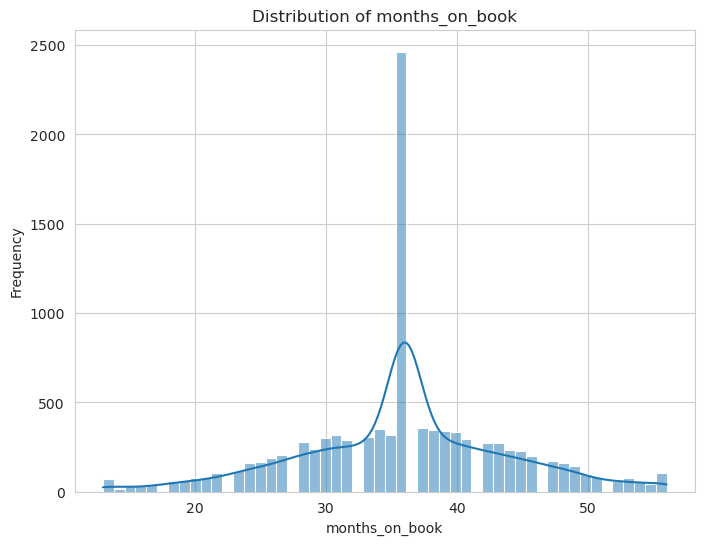

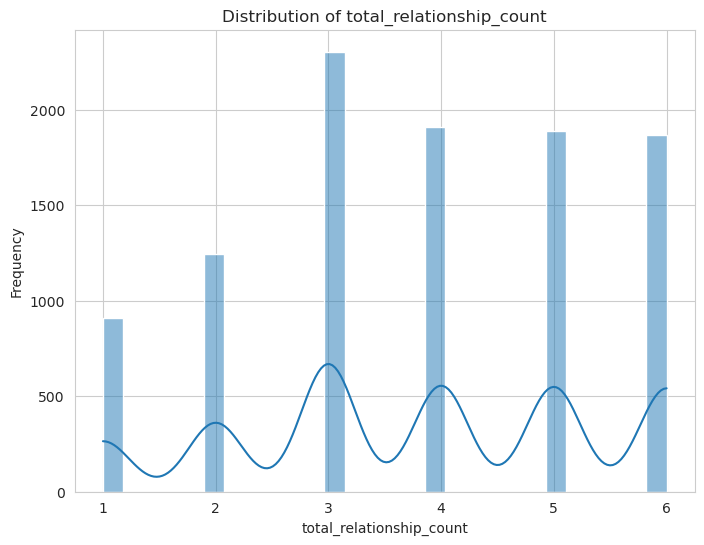

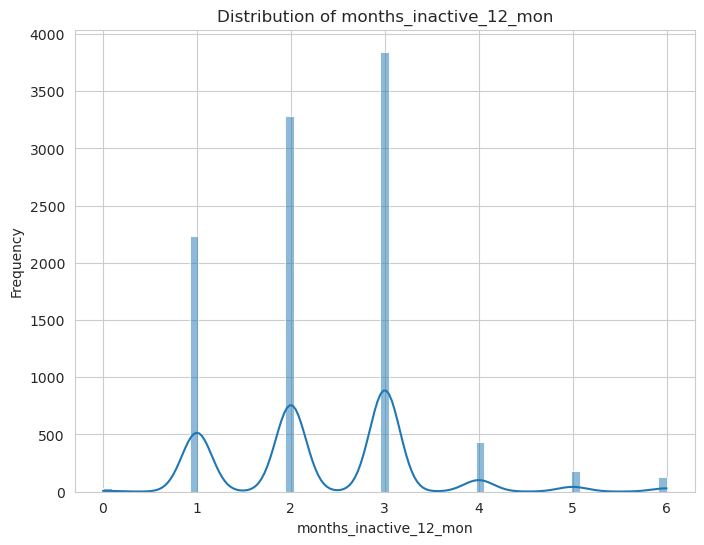

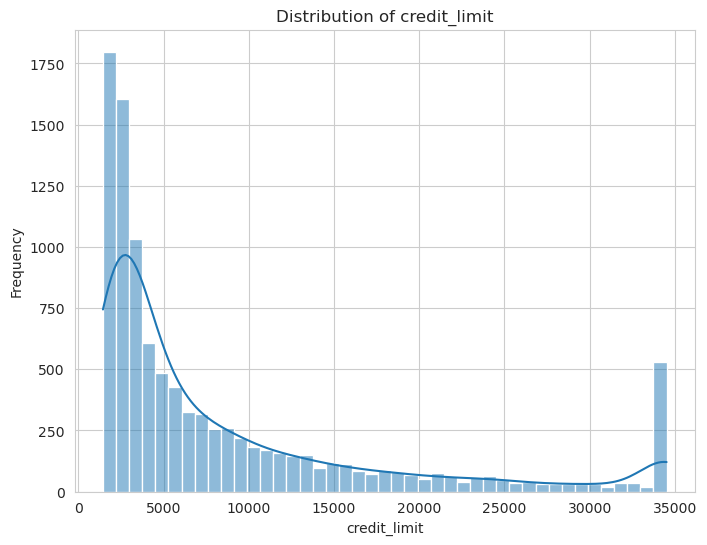

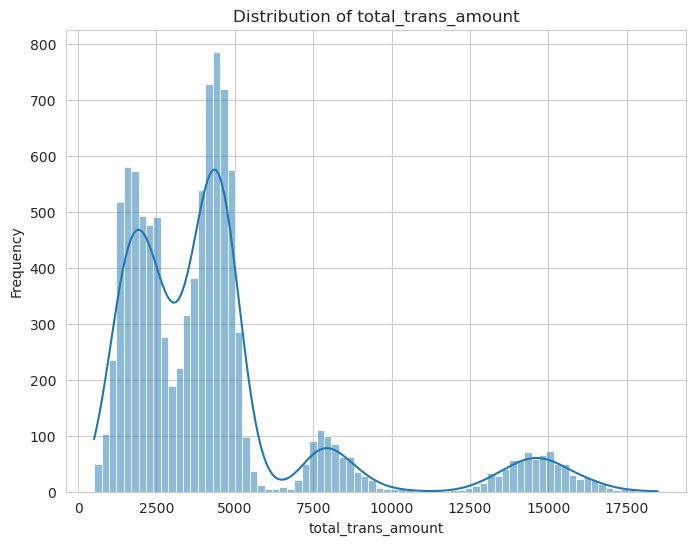

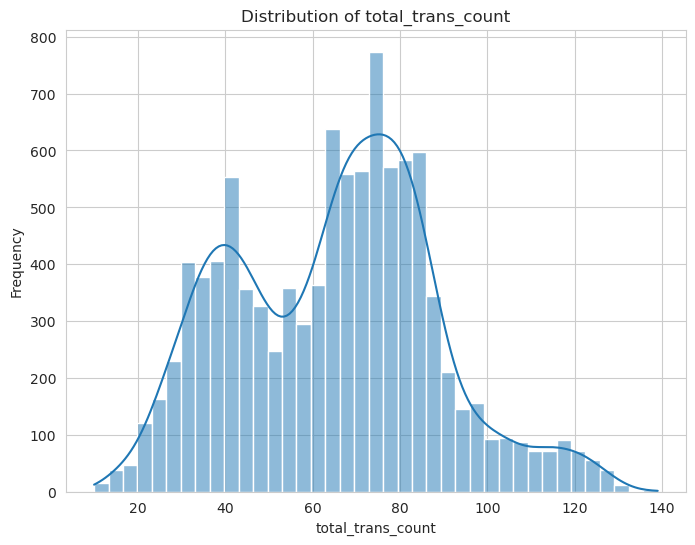

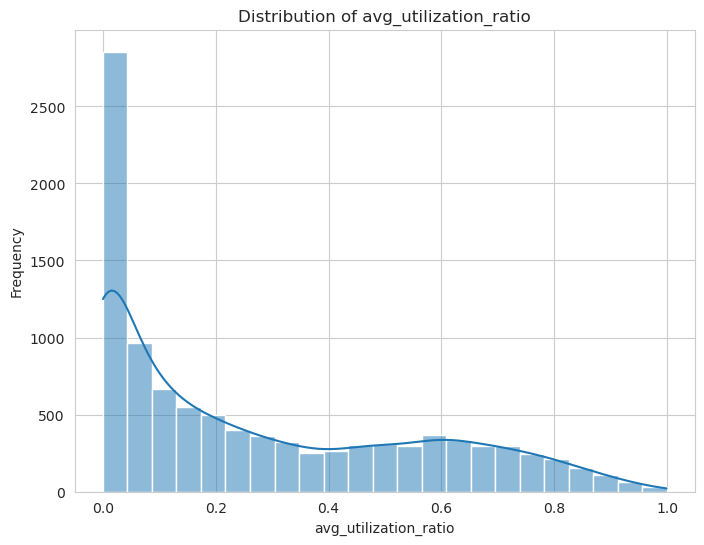

In [9]:
#Plot the distribution of each numeric column

numeric_columns = [
    'age', 'dependent_count', 'estimated_income', 'months_on_book',
    'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
    'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'
]

# Plot the distribution of each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(customer_seg[column], kde=True)
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Observations:
    1. Age is Normally distributed
    2. dependency_count is Normally distributed
    3. estimated_income is skewed to the right
    4. months_on_book is  almost normally distributed with the frequency of 35 being highest
    5. relatiomship_count increase from 1 through to 6
    6. month_of_inactive is skewed to the right
    7. creditLimit is skewed to the right
    8.  total_trans_amount is skewed to the right
    9. total_trans_count is normally distributed  
    10. avg_utilization_ratio is skewed to the right

# Stage 2 Feature Engineering

Let's start dealing with the categorical columns. There are three of them: gender, education level, and marital status.

First, let's check on the gender and education_level columns

The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.
The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order



In [10]:
#Lets create a copy of the original DataFrame
customers_modif= customer_seg.copy()

In [11]:
#Replace the values in the gender column with 1 for "M" and 0 for "F"
customers_modif['gender'] = customers_modif['gender'].map({'M': 1, 'F': 0})


In [12]:
print(customers_modif)

       customer_id  age  gender  dependent_count education_level  \
0        768805383   45       1                3     High School   
1        818770008   49       0                5        Graduate   
2        713982108   51       1                3        Graduate   
3        769911858   40       0                4     High School   
4        709106358   40       1                3      Uneducated   
...            ...  ...     ...              ...             ...   
10122    772366833   50       1                2        Graduate   
10123    710638233   41       1                2        Graduate   
10124    716506083   44       0                1     High School   
10125    717406983   30       1                2        Graduate   
10126    714337233   43       0                2        Graduate   

      marital_status  estimated_income  months_on_book  \
0            Married             69000              39   
1             Single             24000              44   
2        

In [13]:
#Replace the values in the education_level column in the order below
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

customers_modif['education_level'] = customers_modif['education_level'].replace(education_mapping)


Let's deal with the marital_status columns. This column contains these unique values:

Single
Married
Divorced
Unknown

We will use one hot encoding to create dummy variables

In [14]:
# create a dataframe containing dummy variables for the unique values in the marital_status
marital_dummies = pd.get_dummies(customers_modif['marital_status'], prefix='marital', drop_first=False)


In [15]:
#Combine the new DataFrame with the original
customers_modif = pd.concat([customers_modif, marital_dummies], axis=1)


In [16]:
#Drop the original marital_status column.
customers_modif = customers_modif.drop('marital_status', axis=1)

In [17]:
print(customers_modif)

       customer_id  age  gender  dependent_count  education_level  \
0        768805383   45       1                3                1   
1        818770008   49       0                5                3   
2        713982108   51       1                3                3   
3        769911858   40       0                4                1   
4        709106358   40       1                3                0   
...            ...  ...     ...              ...              ...   
10122    772366833   50       1                2                3   
10123    710638233   41       1                2                3   
10124    716506083   44       0                1                1   
10125    717406983   30       1                2                3   
10126    714337233   43       0                2                3   

       estimated_income  months_on_book  total_relationship_count  \
0                 69000              39                         5   
1                 24000          

# 4 Scaling the Data

Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

In [18]:
#Lets Create a new DataFrame without the column customer_id
customers_modif = customers_modif.drop('customer_id', axis=1)


In [19]:
#Lets Instantiate an object from the scikit-learn's StandardScaler() class and fit the new DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customers_modif)

In [20]:
print(scaled_data)

[[-0.16540558  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 [ 0.33357038 -0.9434357   2.04319867 ... -0.92821381  1.2523374
  -0.28260887]
 [ 0.58305837  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 ...
 [-0.29014957 -0.9434357  -1.03646242 ...  1.07733799 -0.79850685
  -0.28260887]
 [-2.03656544  1.05995565 -0.26654715 ... -0.92821381 -0.79850685
   3.53845931]
 [-0.41489356 -0.9434357  -0.26654715 ...  1.07733799 -0.79850685
  -0.28260887]]


In [21]:
#As the outcome of the scaler is an array, we can transform it back to a DataFrame
customers_modified = pd.DataFrame(scaled_data, columns=customers_modif.columns)

In [22]:
print(customers_modified)

            age    gender  dependent_count  education_level  estimated_income  \
0     -0.165406  1.059956         0.503368        -0.752211          0.175810   
1      0.333570 -0.943436         2.043199         0.662787         -0.967166   
2      0.583058  1.059956         0.503368         0.662787          0.785397   
3     -0.789126 -0.943436         1.273283        -0.752211         -0.636973   
4     -0.789126  1.059956         0.503368        -1.459710          0.074212   
...         ...       ...              ...              ...               ...   
10122  0.458314  1.059956        -0.266547         0.662787         -0.281380   
10123 -0.664382  1.059956        -0.266547         0.662787         -0.560775   
10124 -0.290150 -0.943436        -1.036462        -0.752211         -0.738571   
10125 -2.036565  1.059956        -0.266547         0.662787         -0.382978   
10126 -0.414894 -0.943436        -0.266547         0.662787         -0.662372   

       months_on_book  tota

# Step 5 Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

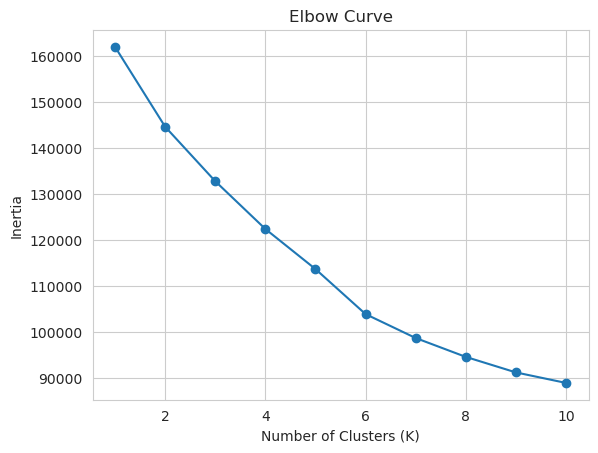

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lets Create an empty list to store the inertia from every model
inertia_values = []

# Define the range of K values 1 to 10
k_values = range(1, 11)

# Iterate over different values of K
for k in k_values:
    # Instantiate a KMeans object with n_clusters=k
    kmeans = KMeans(n_clusters=k)
    
    # Use fit_predict() to create clusters
    clusters = kmeans.fit_predict(customers_modified)
    
    # Append the inertia_ attribute of the model to the empty list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


we are going to use 6 Clusters
This decision is taken from the elbow plot above .
6 is at the perfect position.

In [24]:
# Instantiate a KMeans object with n_clusters=k
kmeans = KMeans(n_clusters=6)
    
# Use fit_predict() to create clusters
clusters = kmeans.fit_predict(customers_modified)

In [25]:
#print the outcome
print(clusters)

[2 1 2 ... 3 4 3]


# Stage 6 Analyzing Results

All that's left now is to analyze the results. We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

We should note the most important characteristics of each cluster and how they can impact the business and marketing strategies for each type of customer

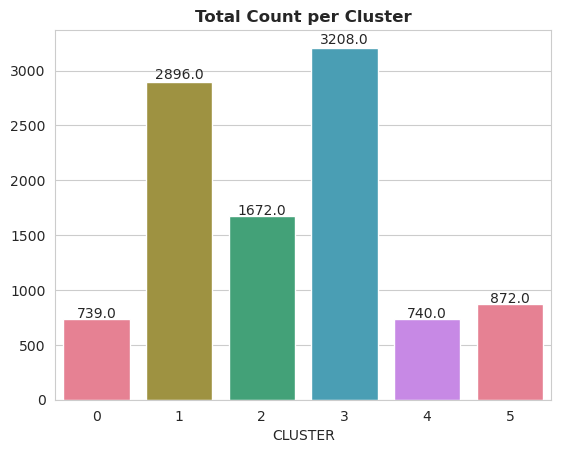

In [26]:
#Create a new column called CLUSTER in the original customers DataFrame. This column should contain the cluster assigned to each customer by the algorithm
customer_seg['CLUSTER'] = clusters

p=sns.countplot(data=customer_seg, x='CLUSTER',palette=sns.color_palette("husl", 5))
plt.title('Total Count per Cluster', weight='bold')
plt.ylabel('')
show_values(p)
plt.show()



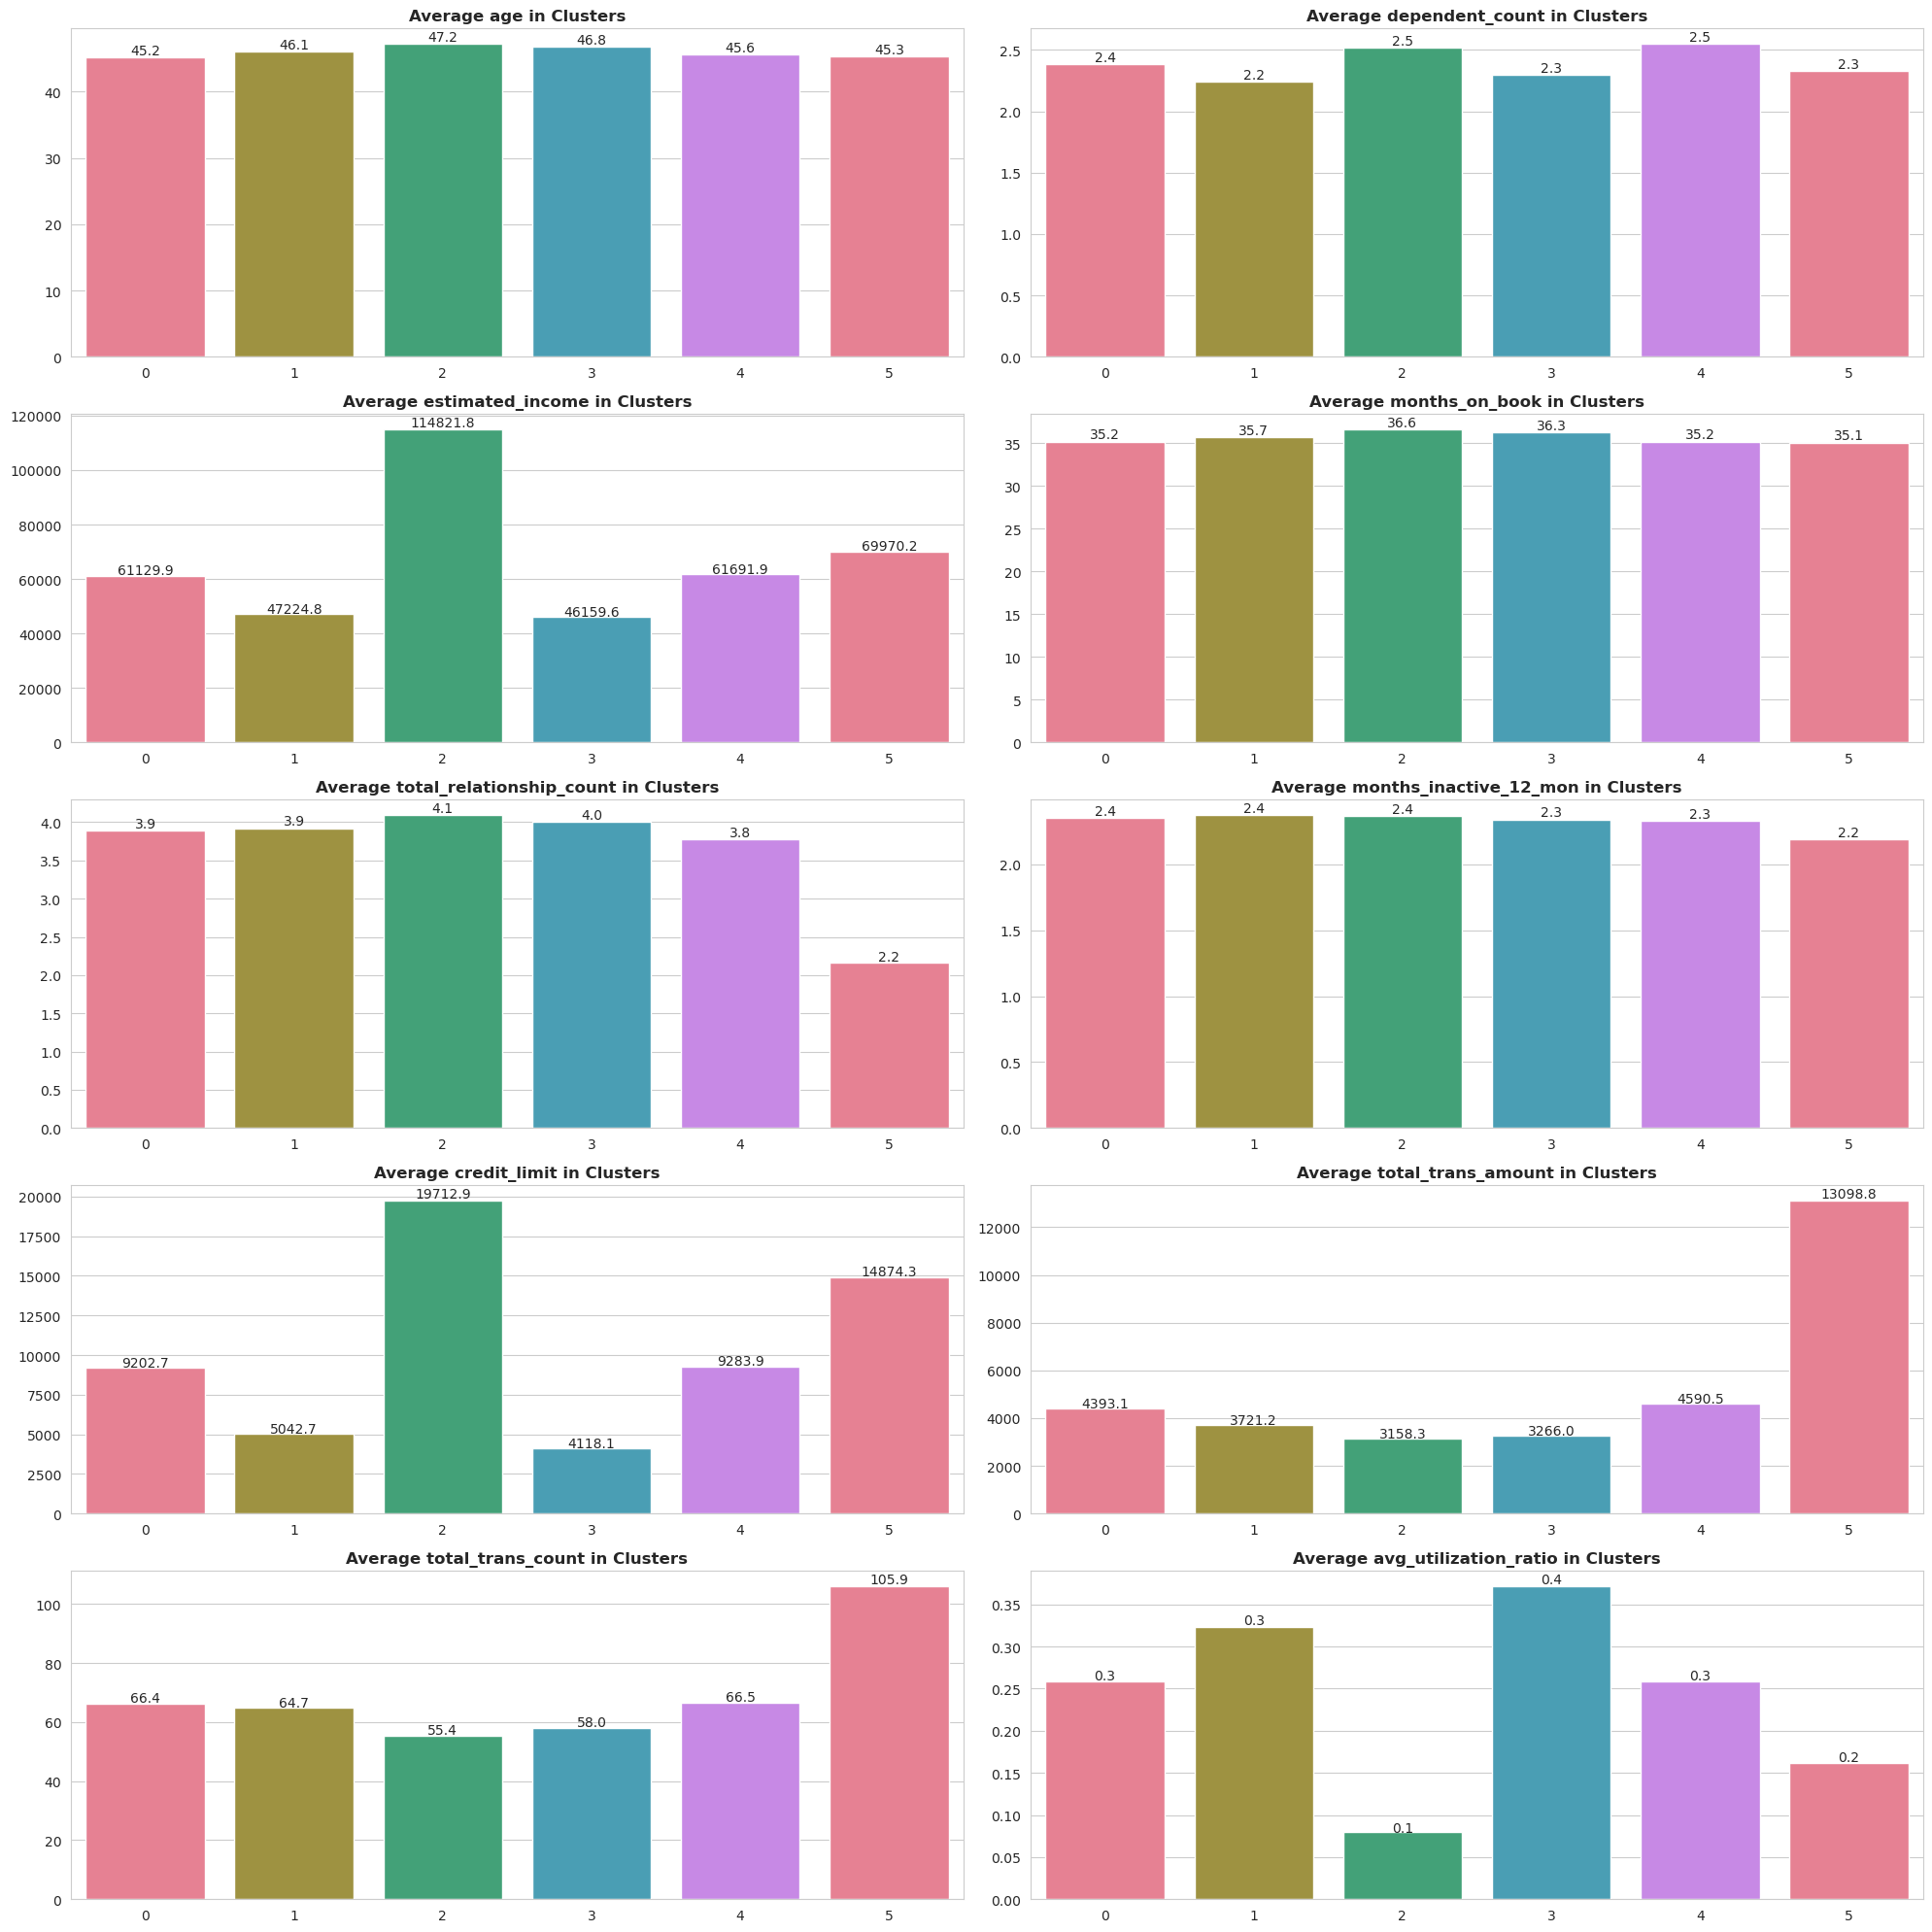

In [27]:
#Group each numeric variable by the CLUSTER column and plot a bar chart
numeric_columns = customer_seg.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns):
    plt.subplot(5,2,i+1)
    p=sns.barplot(data=customer_seg, x='CLUSTER', y=col,palette=sns.color_palette("husl", 5), ci=None)
    plt.title(f'Average {col} in Clusters', weight='bold')
    plt.ylabel('')
    plt.xlabel('')
    show_values(p)
plt.tight_layout()   
plt.show()


Notable Characteristics of numerical features of the Clusters
The following features are fairly uniform across all clusters:

Age
Dependent_count
Months_on_Books
Months_inactive_12_mon
Total_relationship_count
Overview of Cluster Results:

Cluster 1

Estimated_income is $115634.5
Credit_limit is $9,400
Total_trans_amount is $4,700
Totals_trans_count of 67
Utilization_ratio of 0.25
Cluster 2

Estimated_income is $48,000
Credit_limit is $5,300
Total_trans_amount is $4,200
Totals_trans_count of 66
Utilization_ratio of 0.32
Cluster 3

Estimated_income is $111,000
Credit_limit is $22,000
Total_trans_amount is $6,400
Totals_trans_count of 74
Utilization_ratio of 0.08
Cluster 4

Estimated_income is $61,000
Credit_limit is $9,300
Total_trans_amount is $4,500
Totals_trans_count of 67
Utilization_ratio of 0.26
Cluster 5

Estimated_income is $50,000
Credit_limit is $4,900
Total_trans_amount is $3,500
Totals_trans_count of 58
Utilization_ratio of 0.34
Overall Clusters 1 and 4 are very similar. Clusters 2 and 5 are also fairly comparable although Cluster 2 tends to spend more than Cluster 5 despite having overall lower income. Cluster 3 is by far the wealthiest and have the lowest utilization ratio.

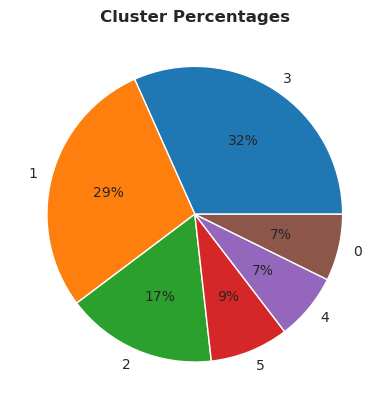

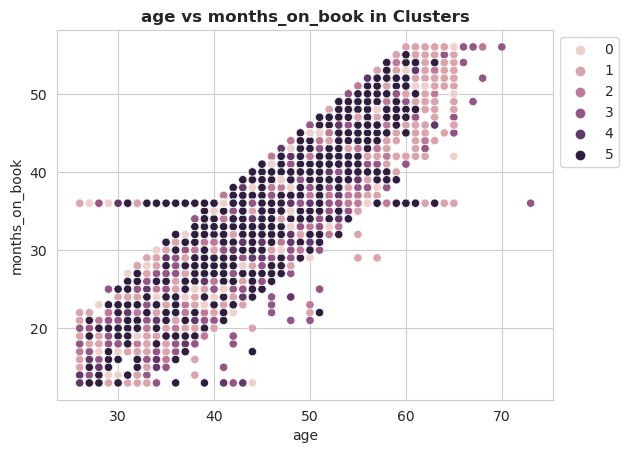

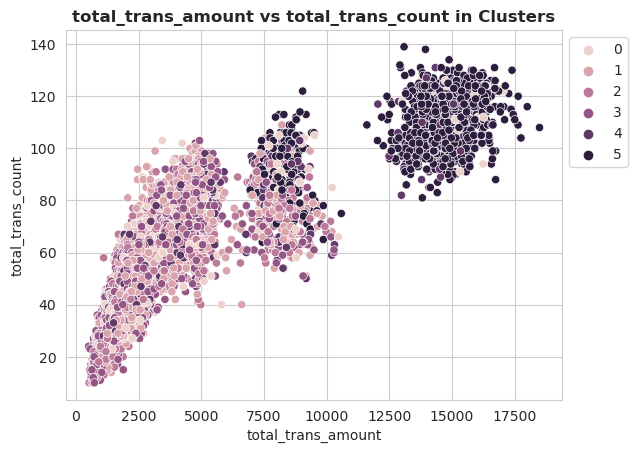

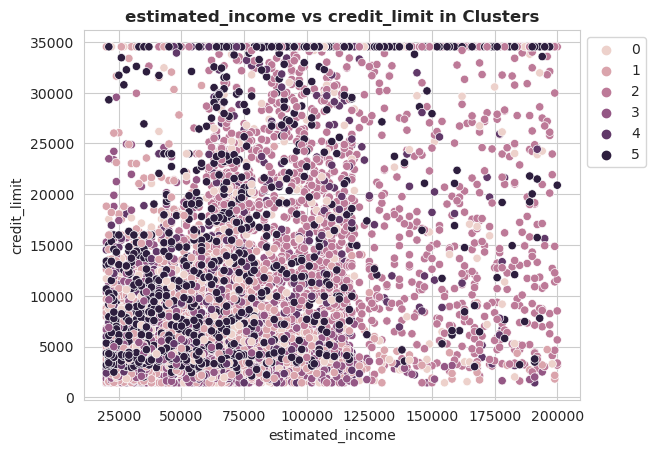

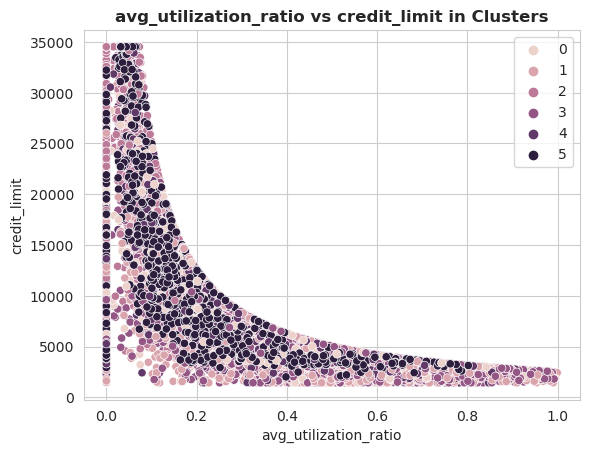

In [28]:
customer_seg['CLUSTER'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.title('Cluster Percentages', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

top_corrs=[['age', 'months_on_book'], ['total_trans_amount', 'total_trans_count'], ['estimated_income', 'credit_limit'],['avg_utilization_ratio','credit_limit']]

for col in top_corrs:
    sns.scatterplot(data=customer_seg, hue='CLUSTER', x=col[0], y=col[1])
    plt.title(col[0] + ' vs ' + col[1] + ' in Clusters', weight='bold')
    plt.ylabel(col[1])
    plt.xlabel(col[0])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()


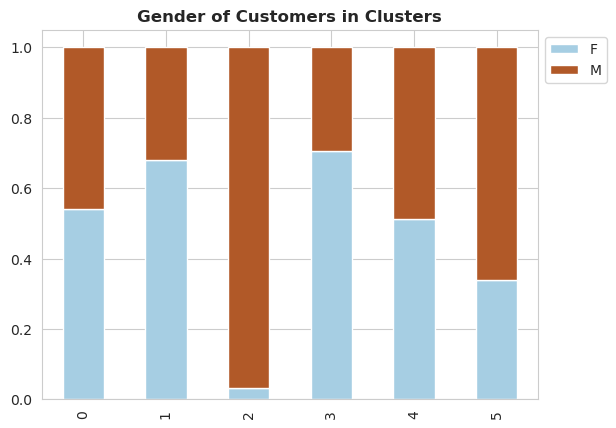

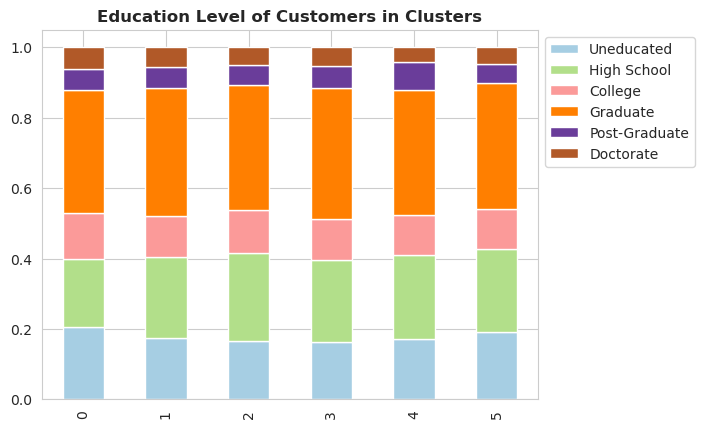

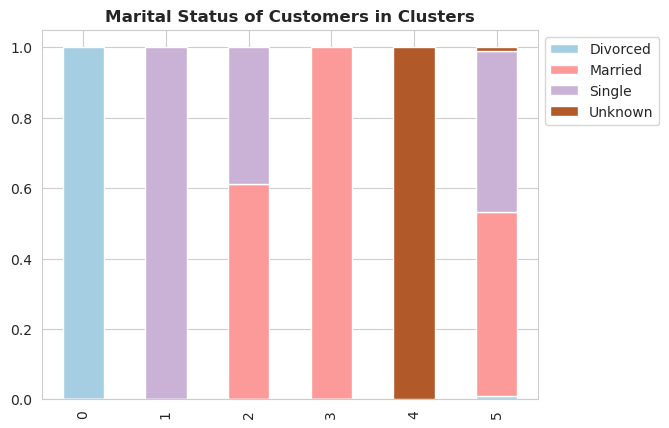

In [29]:
#We will Use the [pandas.crosstab() function to calculate the percentual distribution of each variable per cluster for the categorical columns. Use this data to plot a stacked bar chart

plot_gender = pd.crosstab(
  index=customer_seg['CLUSTER'], columns=customer_seg['gender'],
  values=customer_seg['gender'], aggfunc='size', normalize='index')

plot_education = pd.crosstab(
  index=customer_seg['CLUSTER'], columns=customer_seg['education_level'],
  values=customer_seg['education_level'], aggfunc='size', normalize='index')

order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plot_education = plot_education.reindex(columns=order)

plot_marital = pd.crosstab(
  index=customer_seg['CLUSTER'], columns=customer_seg['marital_status'],
  values=customer_seg['marital_status'], aggfunc='size', normalize='index')

names=['Gender of Customers in Clusters', 'Education Level of Customers in Clusters', 'Marital Status of Customers in Clusters']

for name, duck in zip(names,[plot_gender, plot_education, plot_marital]):
    duck.plot.bar(stacked=True,colormap='Paired')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(name, weight='bold')
    plt.xlabel('')
    plt.show()   

Business Recommendations
Cluster 1 is middle income, but overall has a very high variablility when it comes to finances. Because of this it is very difficult to make any recommendations without more datapoints. This Cluster should be considered a wildcard at this point.

Cluster 2 is overall low income with high credit utilization. Many of customers in this Cluster are likely at the very beginning of their careers or are near or past retirement. While increasing fees might increase short term profitability there is a danger of losing these customers if pressed too hard. It would not be prudent to lose the loyalty of this segment as many of them will enter their prime earning stage in their careers within the next few years. Increase monthly transaction counts through incentives to maximize revenue from fees from these individual transactions.

Cluster 3 is by far the highest earning cluster with the lowest credit utilization. Individuals in this clusters tend to be middle-aged males likely in the peak of their career. As such, this cluster has the most disposable income. The low utilization likely means that a good amount of this segment pay off their credit cards from month to month. Finding ways to increase utilzation through rewards and incentives might be prudent. It might also be useful to do market research on increasing the amount of time transactions stay on cards before being paid off to increase revenue from interest rates.